# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Julian Kurnianto]
- **Email:** [jkurnianto227@gmail.com]
- **ID Dicoding:** [julian_kurnianto_123]

## Menentukan Pertanyaan Bisnis

- How do weather conditions affect bike rental usage?
- What are the peak seasons for bike rentals?

## Import Semua Packages/Library yang Digunakan

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [26]:
day_df = pd.read_csv("https://raw.githubusercontent.com/juliankkk/Project-Data-Analisis-/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
hours_df = pd.read_csv("https://raw.githubusercontent.com/juliankkk/Project-Data-Analisis-/refs/heads/main/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Both data are successfully shown
- The day data shows the summary of sharing bike by day while hour data by hour

### Assessing Data

In [49]:
day_df = pd.read_csv("https://raw.githubusercontent.com/juliankkk/Project-Data-Analisis-/refs/heads/main/day.csv")
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: da

In [51]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/juliankkk/Project-Data-Analisis-/refs/heads/main/hour.csv")
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  c

**Insight:**
- There is no duplication in both datasets
- The data type of variable 'dtetday' stored as an object (string), but it should be converted into a proper datetime format. 

### Cleaning Data

In [57]:
day_df_cleaned = day_df.drop_duplicates()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
hour_df_cleaned = hour_df.drop_duplicates()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


**Insight:**
- There is no duplicate
- All data are already clean 

## Exploratory Data Analysis (EDA)

### Explore ...

In [65]:
day_df.describe(include="all")

/tmp/ipykernel_1209/73808379.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")
/tmp/ipykernel_1209/73808379.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [67]:
hour_df.describe(include="all")

/tmp/ipykernel_1209/1264340832.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


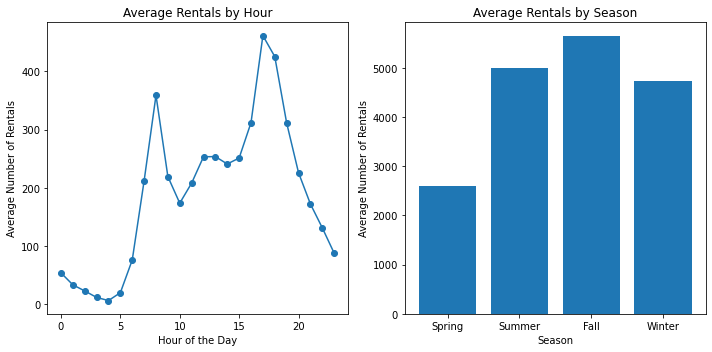

In [77]:
# Extracting relevant columns for analysis
day_df['month'] = day_df['dteday'].dt.month
day_df['day_of_week'] = day_df['dteday'].dt.weekday
hour_df['hour'] = hour_df['hr']

# Peak times for bike rentals: Aggregating hourly data by hour and season
hourly_rentals = hour_df.groupby('hour')['cnt'].mean()
seasonal_rentals = day_df.groupby('season')['cnt'].mean()

# Weather impact on bike rentals: Analyzing correlation with weather-related variables (temp, hum, windspeed, weathersit)
weather_impact = hour_df[['temp', 'hum', 'windspeed', 'weathersit', 'cnt']].corr()

# Plotting peak times for bike rentals
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hourly_rentals.index, hourly_rentals.values, marker='o')
plt.title('Average Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Rentals')

# Plotting rentals by season
plt.subplot(1, 2, 2)
plt.bar(['Spring', 'Summer', 'Fall', 'Winter'], seasonal_rentals)
plt.title('Average Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Rentals')

plt.tight_layout()
plt.show()



**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

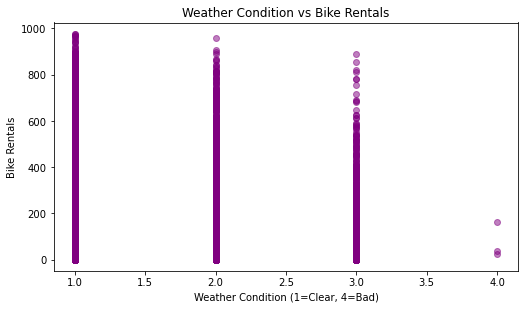

In [91]:
import matplotlib.pyplot as plt

# Temperature vs Bike Rentals
plt.figure(figsize=(14, 8))

# Subplot : Weathersit vs Rentals
plt.subplot(2, 2, 4)
plt.scatter(hour_df['weathersit'], hour_df['cnt'], alpha=0.5, color='purple')
plt.title('Weather Condition vs Bike Rentals')
plt.xlabel('Weather Condition (1=Clear, 4=Bad)')
plt.ylabel('Bike Rentals')

plt.tight_layout()
plt.show()


### Pertanyaan 2:

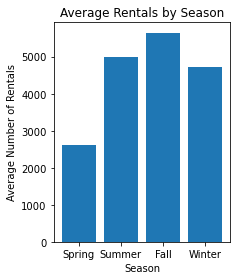

In [85]:
# Extracting relevant columns for analysis
day_df['month'] = day_df['dteday'].dt.month
day_df['day_of_week'] = day_df['dteday'].dt.weekday
hour_df['hour'] = hour_df['hr']

# Peak times for bike rentals: Aggregating hourly data by hour and season
hourly_rentals = hour_df.groupby('hour')['cnt'].mean()
seasonal_rentals = day_df.groupby('season')['cnt'].mean()

# Weather impact on bike rentals: Analyzing correlation with weather-related variables (temp, hum, windspeed, weathersit)
weather_impact = hour_df[['temp', 'hum', 'windspeed', 'weathersit', 'cnt']].corr()

# Plotting rentals by season
plt.subplot(1, 2, 2)
plt.bar(['Spring', 'Summer', 'Fall', 'Winter'], seasonal_rentals)
plt.title('Average Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Rentals')

plt.tight_layout()
plt.show()

In [ ]:
**Insight:**
- The peak time and season for rental bike is in fall
- The better the weather the higher the rental (1 indicate the good weather ascending number is the worse the weather is)

## Analisis Lanjutan (Opsional)

NameError: name 'all_df' is not defined

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2